- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
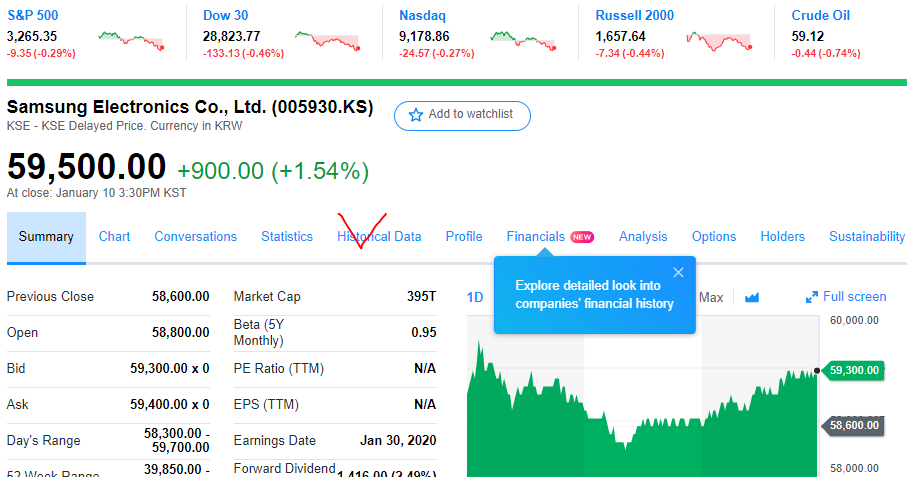

- 기간 선택 후 Download Data 클릭
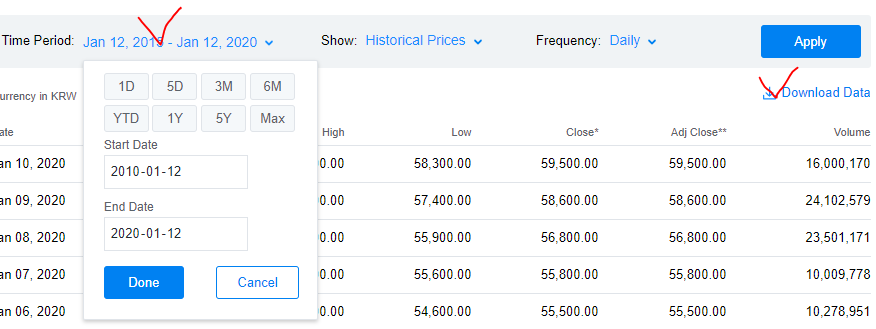

## Data Loading 및 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')

In [3]:
df = pd.read_csv('005930.KS.csv')
df.shape

(5361, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5356,2021-04-23,81900.0,82900.0,81600.0,82800.0,82800.0,17805080.0
5357,2021-04-26,82900.0,83500.0,82600.0,83500.0,83500.0,15489938.0
5358,2021-04-27,83200.0,83300.0,82500.0,82900.0,82900.0,12941533.0
5359,2021-04-28,83200.0,83200.0,82100.0,82100.0,82100.0,15596759.0
5360,2021-04-29,82400.0,82500.0,81500.0,81700.0,81700.0,18710535.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5361 non-null   object 
 1   Open       5355 non-null   float64
 2   High       5355 non-null   float64
 3   Low        5355 non-null   float64
 4   Close      5355 non-null   float64
 5   Adj Close  5355 non-null   float64
 6   Volume     5355 non-null   float64
dtypes: float64(6), object(1)
memory usage: 293.3+ KB


In [7]:
df.isna().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [9]:
df.loc[df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [10]:
# date를 index로
# date:object => datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5361 non-null   datetime64[ns]
 1   Open       5355 non-null   float64       
 2   High       5355 non-null   float64       
 3   Low        5355 non-null   float64       
 4   Close      5355 non-null   float64       
 5   Adj Close  5355 non-null   float64       
 6   Volume     5355 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 293.3 KB


In [11]:
df.set_index('Date', inplace=True)
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0


<AxesSubplot:xlabel='Date'>

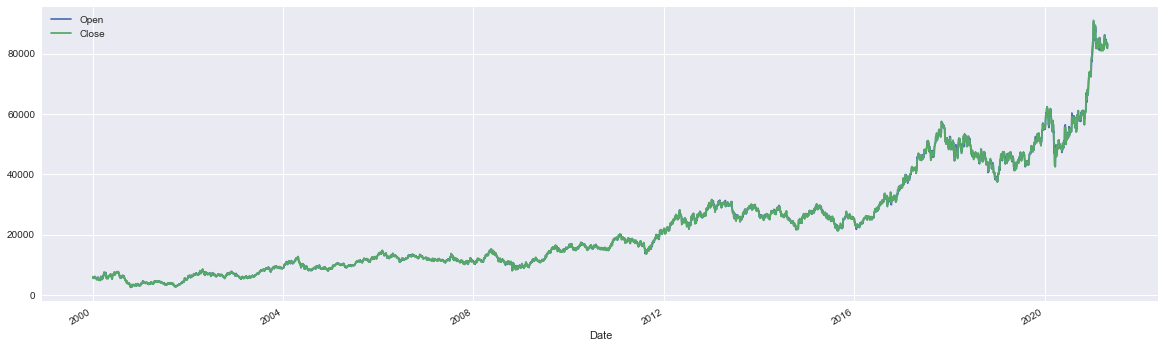

In [12]:
df[['Open', 'Close']].plot(figsize=(20,6))

<AxesSubplot:xlabel='Date'>

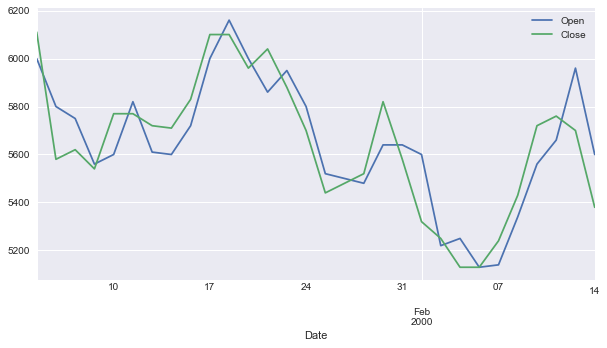

In [13]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(10,5))

In [14]:
# 결측치 처리
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5355 entries, 2000-01-04 to 2021-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5355 non-null   float64
 1   High       5355 non-null   float64
 2   Low        5355 non-null   float64
 3   Close      5355 non-null   float64
 4   Adj Close  5355 non-null   float64
 5   Volume     5355 non-null   float64
dtypes: float64(6)
memory usage: 292.9 KB


In [16]:
# Adj Close 컬럼 제거
df.drop(columns=['Adj Close'], inplace=True)

In [17]:
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0


### X, y 분리

In [18]:
df_y = df['Close'].to_frame() # df['Close']: Series    Series.to_frame(): Series=>DataFrame (2차원)
df_X = df

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [19]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(df_X)
y = y_scaler.fit_transform(df_y)

In [21]:
X[:3], y[:3]

(array([[0.03942571, 0.03562314, 0.03720717, 0.03829161, 0.45181622],
        [0.03714676, 0.03509145, 0.03559945, 0.0322873 , 0.45476966],
        [0.03657703, 0.03211399, 0.03628847, 0.03274046, 0.33121213]]),
 array([[0.03829161],
        [0.0322873 ],
        [0.03274046]]))

In [23]:
y_scaler.inverse_transform(y[:3]) # scaled값을 원상복구

array([[6110.],
       [5580.],
       [5620.]])

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
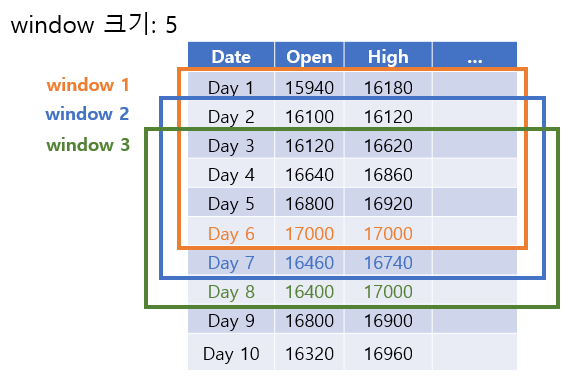     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [24]:
window_size = 50 # 한개 input값에 들어갈 연속된 값의 개수
data_X = [] # [[1-50], [2-51], [3-52], .....]
data_y = [] # [51,     52,      53,  , .....]

for i in range(len(y)-window_size):
    data_X.append(X[i:i+window_size])
    data_y.append(y[i+window_size])

In [29]:
np.shape(data_X), np.shape(data_y), len(y)-window_size

((5305, 50, 5), (5305, 1), 5305)

## Train, Test 분리

In [31]:
# train:test = 8:2
train_index = int(len(data_y)*0.8)
print(train_index)

4244


In [33]:
X_train, y_train = np.array(data_X[:train_index]), np.array(data_y[:train_index])
X_test, y_test = np.array(data_X[train_index:]), np.array(data_y[train_index:])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4244, 50, 5), (4244, 1), (1061, 50, 5), (1061, 1))

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Dense에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

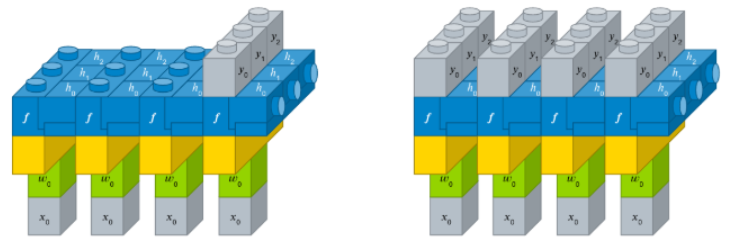

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
# 하이퍼파라미터
LEARNING_RATE =0.001
N_EPOCHS = 100
N_BATCHS = 100
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

In [37]:
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [44]:
# 모델 구성
def create_model():
    model = keras.Sequential()
    model.add(layers.Input((window_size,5)))
    # LSTM
    model.add(layers.LSTM(32, activation='relu', return_sequences=False))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1)) # 회귀
    
    return model

In [48]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
             loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [49]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 42 steps, validate for 11 steps
Epoch 1/100
42/42 [==============================] - 2s 36ms/step - loss: 0.0052 - val_loss: 0.1896
Epoch 2/100
42/42 [==============================] - 1s 13ms/step - loss: 1.0171e-04 - val_loss: 0.0963
Epoch 3/100
42/42 [==============================] - 1s 14ms/step - loss: 4.8699e-05 - val_loss: 0.0676
Epoch 4/100
42/42 [==============================] - 1s 14ms/step - loss: 4.4088e-05 - val_loss: 0.0430
Epoch 5/100
42/42 [==============================] - 1s 14ms/step - loss: 4.1819e-05 - val_loss: 0.0315
Epoch 6/100
42/42 [==============================] - 1s 13ms/step - loss: 3.8744e-05 - val_loss: 0.0259
Epoch 7/100
42/42 [==============================] - 1s 14ms/step - loss: 3.7610e-05 - val_loss: 0.0189
Epoch 8/100
42/42 [==============================] - 1s 14ms/step - loss: 3.6714e-05 - val_loss: 0.0170
Epoch 9/100
42/42 [==============================] - 1s 14ms/step - loss: 3.4929e-05 - val_loss: 0.0123
Epoch 10/100
42/42 [======

## 모델 학습, 평가

In [50]:
# 평가
loss = model.evaluate(test_dataset)

11/11 [==============================] - 0s 6ms/step - loss: 0.0033


In [51]:
loss

0.0033332199752542442

In [52]:
y_scaler.inverse_transform(np.array(loss).reshape(-1,1))

array([[3024.22332722]])

## 예측

In [53]:
pred = model.predict(X_test)
pred_price = y_scaler.inverse_transform(pred)

In [54]:
pred_price[-3:]

array([[96408.65 ],
       [96250.14 ],
       [95793.914]], dtype=float32)

In [59]:
y_price = y_scaler.inverse_transform(y_test)

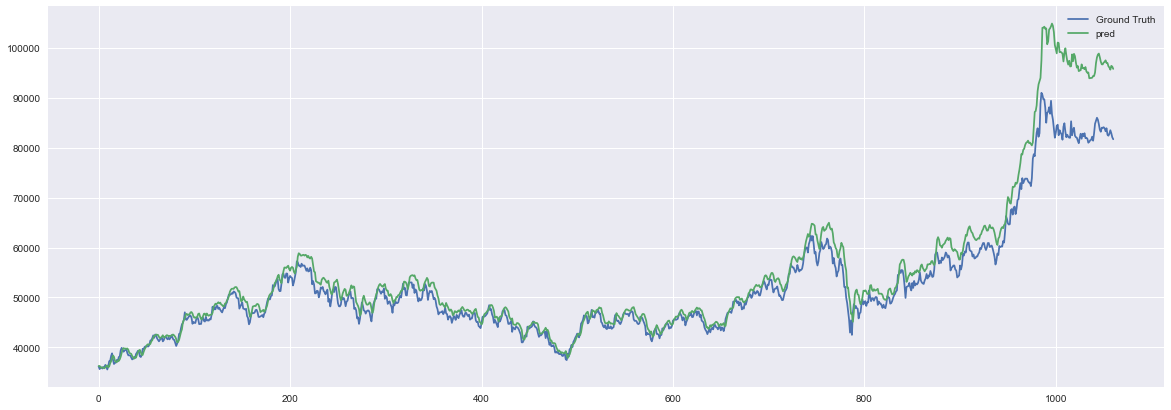

In [61]:
# 실제값, 예측값을 비교
plt.figure(figsize=(20,7))
plt.plot(y_price, label="Ground Truth")
plt.plot(pred_price, label='pred')
plt.legend()
plt.show()

In [57]:
df_y

,Close
Date,
2000-01-04,6110.0
2000-01-05,5580.0
2000-01-06,5620.0
2000-01-07,5540.0
2000-01-10,5770.0
...,...
2021-04-23,82800.0
2021-04-26,83500.0
2021-04-27,82900.0


In [58]:
pred_price

array([[36248.605],
       [36271.98 ],
       [36001.023],
       ...,
       [96408.65 ],
       [96250.14 ],
       [95793.914]], dtype=float32)

In [1]:
# 내일 주가
pred = model.predict(X_test[-1][np.newaxis,...])
pred_price = y_scaler.inverse_transform(pred)
pred_price

NameError: name 'model' is not defined